- This notebook is to investigate new molecules

In [1]:
import sys
sys.path.append("../src/models")
sys.path.append("../src")
sys.path.append("../")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [3]:
from utils import *

In [5]:
# 1. get the representation for old molecules
# 2. get the representation for new molecules
# 3. do some analysis?

In [6]:
# 1. get the representation for old molecules

In [4]:
df_structured = pd.read_csv('../../data/df_structured_exp_20250414')
df_structured

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,smi1,conc1,smi2,conc2,smi3,conc3,smi4,conc4,smi5,conc5,smi6,conc6,smi7,conc7,vesicles_formation
0,CCCCCCCCCC(=O)O,0.615186,CCCCCCCCCC(=O)[O-],0.955511,CCCCCCCCCCN,1.231101,CCCCCCCCCC[N+](C)(C)C.[Br-],1.552868,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.677097,CCCCCCCCCCO,0.441476,CCCCCCCCCC(=O)OCC(CO)O,0.579418,22
1,CCCCCCCCCC(=O)O,1.487270,CCCCCCCCCC(=O)[O-],0.644482,CCCCCCCCCCN,0.175633,CCCCCCCCCC[N+](C)(C)C.[Br-],1.056053,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.216395,CCCCCCCCCCO,0.207827,CCCCCCCCCC(=O)OCC(CO)O,0.107059,9
2,CCCCCCCCCC(=O)O,1.163151,CCCCCCCCCC(=O)[O-],0.705570,CCCCCCCCCCN,1.294727,CCCCCCCCCC[N+](C)(C)C.[Br-],1.787584,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.658228,CCCCCCCCCCO,0.159138,CCCCCCCCCC(=O)OCC(CO)O,0.202941,6
3,CCCCCCCCCC(=O)O,1.531476,CCCCCCCCCC(=O)[O-],1.787584,CCCCCCCCCCN,0.381855,CCCCCCCCCC[N+](C)(C)C.[Br-],0.071390,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.475907,CCCCCCCCCCO,0.589175,CCCCCCCCCC(=O)OCC(CO)O,0.113329,2
4,CCCCCCCCCC(=O)O,1.170933,CCCCCCCCCC(=O)[O-],1.441019,CCCCCCCCCCN,1.677097,CCCCCCCCCC[N+](C)(C)C.[Br-],0.885832,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.011601,CCCCCCCCCCO,0.750236,CCCCCCCCCC(=O)OCC(CO)O,0.300105,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,CCCCCCCCCC(=O)O,0.112435,CCCCCCCCCC(=O)[O-],0.107957,CCCCCCCCCCN,0.009950,CCCCCCCCCC[N+](C)(C)C.[Br-],0.639219,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.020651,CCCCCCCCCCO,0.000000,CCCCCCCCCC(=O)OCC(CO)O,0.007968,0
332,CCCCCCCCCC(=O)O,0.019803,CCCCCCCCCC(=O)[O-],0.006976,CCCCCCCCCCN,0.064851,CCCCCCCCCC[N+](C)(C)C.[Br-],0.916291,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],0.821980,CCCCCCCCCCO,0.033918,CCCCCCCCCC(=O)OCC(CO)O,0.045929,59
333,CCCCCCCCCC(=O)O,0.137150,CCCCCCCCCC(=O)[O-],0.076961,CCCCCCCCCCN,0.043059,CCCCCCCCCC[N+](C)(C)C.[Br-],0.548121,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.090244,CCCCCCCCCCO,0.013410,CCCCCCCCCC(=O)OCC(CO)O,0.018822,2
334,CCCCCCCCCC(=O)O,0.013903,CCCCCCCCCC(=O)[O-],0.028587,CCCCCCCCCCN,0.092579,CCCCCCCCCC[N+](C)(C)C.[Br-],0.693147,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],0.974560,CCCCCCCCCCO,0.049742,CCCCCCCCCC(=O)OCC(CO)O,0.036332,15


In [5]:
train_smiles_list = pd.concat([df_structured[f'smi{i}'] for i in range(1, 8)]).unique().tolist()
train_smiles_list

['CCCCCCCCCC(=O)O',
 'CCCCCCCCCC(=O)[O-]',
 'CCCCCCCCCCN',
 'CCCCCCCCCC[N+](C)(C)C.[Br-]',
 'CCCCCCCCCCOS(=O)(=O)[O-].[Na+]',
 'CCCCCCCCCCO',
 'CCCCCCCCCC(=O)OCC(CO)O']

In [6]:
model_SMI = load_smi_ted(folder='../models/smi_ted/smi_ted_light', ckpt_filename='smi-ted-Light_40.pt')

return_tensor=True
with torch.no_grad():
    x_emb = model_SMI.encode(train_smiles_list, return_torch=return_tensor)

x_emb_array  = x_emb.numpy()
x_emb_frame = pd.DataFrame(x_emb_array)
x_emb_frame

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.75it/s]
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.279066,-0.458648,0.091548,0.404946,0.455949,-0.691573,1.255427,0.088173,0.862774,0.266990,...,-1.211633,-0.169369,0.267686,0.286902,-0.558033,0.553786,-0.620042,0.965163,0.615083,-0.056473
1,0.288654,-0.434038,0.105828,0.421752,0.521891,-0.699296,1.231984,0.091226,0.881254,0.251731,...,-1.288490,-0.220501,0.254198,0.267757,-0.484245,0.516377,-0.576457,0.937761,0.578492,0.070295
2,0.255314,-0.418480,0.102317,0.400680,0.444001,-0.697398,1.330629,0.098152,0.842760,0.274890,...,-1.270537,-0.087000,0.216787,0.235862,-0.609026,0.521273,-0.648661,1.023411,0.644154,-0.116266
3,0.319496,-0.577118,0.129883,0.387976,0.575654,-0.588694,1.313632,0.088390,0.874925,0.238840,...,-1.314946,-0.240379,0.245210,0.302793,-0.527965,0.461640,-0.628468,0.872280,0.655087,-0.109334
4,0.310658,-0.353805,0.115317,0.406025,0.424815,-0.716786,1.176777,0.104488,0.949037,0.189747,...,-1.330239,-0.223166,0.291875,0.378562,-0.495612,0.461788,-0.483424,0.859165,0.598253,-0.056043
5,0.318460,-0.431892,0.093248,0.397231,0.422566,-0.751730,1.337597,0.087972,0.802784,0.278718,...,-1.255841,-0.151235,0.273325,0.216738,-0.600926,0.485822,-0.609614,1.002799,0.640591,-0.051354
6,0.368795,-0.467087,0.120610,0.425117,0.479734,-0.726235,1.239169,0.097717,0.821536,0.231372,...,-1.367643,-0.218191,0.315461,0.315508,-0.503464,0.556162,-0.588418,0.857319,0.619671,-0.054716


In [ ]:
# Get representation of new molecules

In [7]:
# Get the similes info for amphiphiles
info_path = '/Users/haoliu/Documents/Hao/Fordham/Cheminformatics/MD/Amphiphiles/info_new_molecules.csv'
df_info = pd.read_csv(info_path)
df_info

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,ID,Name,Molecular_Formula,InChI,SMILES
0,A1,Decanal,C10H20O,InChI=1S/C10H20O/c1-2-3-4-5-6-7-8-9-10-11/h10H...,CCCCCCCCCC=O
1,A2,Geraniol,C10H18O,"InChI=1S/C10H18O/c1-9(2)5-4-6-10(3)7-8-11/h5,7...",CC(=CCC/C(=C/CO)/C)C
2,A3,Hexadecanoic acid,C16H32O2,InChI=1S/C16H32O2/c1-2-3-4-5-6-7-8-9-10-11-12-...,CCCCCCCCCCCCCCCC(=O)O
3,A4,Myristoleic acid,C14H26O2,InChI=1S/C14H26O2/c1-2-3-4-5-6-7-8-9-10-11-12-...,CCCC/C=C\CCCCCCCC(=O)O
4,A5,Glycine octylester,C10H22ClNO2,InChI=1S/C10H21NO2.ClH/c1-2-3-4-5-6-7-8-13-10(...,CCCCCCCCOC(=O)CN.Cl
5,A6,Perfluorooctanoic acid,C8HF15O2,"InChI=1S/C8HF15O2/c9-2(10,1(24)25)3(11,12)4(13...",C(=O)(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F...
6,A7,"1H,1H,2H,2H-Tridecafluorooctane-1-sulphonic acid",C8H5F13O3S,"InChI=1S/C8H5F13O3S/c9-3(10,1-2-25(22,23)24)4(...",C(CS(=O)(=O)O)C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)...
7,A8,Heptadecafluorooctanesulfonic acid potassium salt,C8F17KO3S,"InChI=1S/C8HF17O3S.K/c9-1(10,3(13,14)5(17,18)7...",C(C(C(C(C(F)(F)S(=O)(=O)[O-])(F)F)(F)F)(F)F)(C...


In [8]:
df_info['SMILES'].values

array(['CCCCCCCCCC=O', 'CC(=CCC/C(=C/CO)/C)C', 'CCCCCCCCCCCCCCCC(=O)O',
       'CCCC/C=C\\CCCCCCCC(=O)O', 'CCCCCCCCOC(=O)CN.Cl',
       'C(=O)(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)O',
       'C(CS(=O)(=O)O)C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F',
       'C(C(C(C(C(F)(F)S(=O)(=O)[O-])(F)F)(F)F)(F)F)(C(C(C(F)(F)F)(F)F)(F)F)(F)F.[K+]'],
      dtype=object)

In [32]:
df_info['Name'].values

array(['Decanal', 'Geraniol', 'Hexadecanoic acid', 'Myristoleic acid',
       'Glycine octylester', 'Perfluorooctanoic acid',
       '1H,1H,2H,2H-Tridecafluorooctane-1-sulphonic acid',
       'Heptadecafluorooctanesulfonic acid potassium salt'], dtype=object)

In [9]:
new_smiles_list = list(df_info['SMILES'])
new_smiles_list

['CCCCCCCCCC=O',
 'CC(=CCC/C(=C/CO)/C)C',
 'CCCCCCCCCCCCCCCC(=O)O',
 'CCCC/C=C\\CCCCCCCC(=O)O',
 'CCCCCCCCOC(=O)CN.Cl',
 'C(=O)(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)O',
 'C(CS(=O)(=O)O)C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F',
 'C(C(C(C(C(F)(F)S(=O)(=O)[O-])(F)F)(F)F)(F)F)(C(C(C(F)(F)F)(F)F)(F)F)(F)F.[K+]']

In [10]:
model_SMI = load_smi_ted(folder='../models/smi_ted/smi_ted_light', ckpt_filename='smi-ted-Light_40.pt')

return_tensor=True
with torch.no_grad():
    x_emb_new = model_SMI.encode(new_smiles_list, return_torch=return_tensor)

x_emb_array  = x_emb_new.numpy()
x_emb_frame_new = pd.DataFrame(x_emb_array)
x_emb_frame_new

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 8/8 [00:01<00:00,  4.70it/s]
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.321784,-0.396263,0.079993,0.408343,0.380089,-0.735571,1.287984,0.080023,0.823194,0.286951,...,-1.279485,-0.177142,0.295531,0.195794,-0.603759,0.507900,-0.604963,1.024870,0.614184,-0.047003
1,0.441174,-0.559420,0.042851,0.445042,0.519372,-0.770281,1.191538,0.062405,0.796033,0.195744,...,-1.359118,-0.173741,0.291239,0.257955,-0.571302,0.471427,-0.690318,0.864588,0.588334,-0.139600
2,0.236943,-0.461366,0.113574,0.360069,0.466244,-0.662496,1.253426,0.095736,0.848422,0.280358,...,-1.163729,-0.191826,0.231238,0.314967,-0.540737,0.561245,-0.626047,0.920715,0.585380,-0.031190
3,0.308336,-0.445070,0.102213,0.416952,0.428434,-0.687143,1.238488,0.110933,0.845394,0.259240,...,-1.227388,-0.241062,0.258352,0.268291,-0.552531,0.544602,-0.632200,0.915855,0.574854,-0.061036
4,0.320586,-0.408794,0.093084,0.417152,0.482001,-0.650152,1.237803,0.103780,0.863477,0.246027,...,-1.376389,-0.185811,0.292180,0.360152,-0.572503,0.586540,-0.561739,0.880553,0.593239,-0.154524
5,0.321468,-0.498890,0.083883,0.357241,0.567517,-0.540589,0.949200,0.124039,0.893354,0.061151,...,-1.367451,-0.111726,0.185543,0.328979,-0.583827,0.601151,-0.707333,0.679676,0.479544,-0.106846
6,0.341301,-0.482192,0.131967,0.365455,0.488753,-0.575958,0.941062,0.149482,0.863239,0.081640,...,-1.364789,-0.118071,0.206089,0.354483,-0.552519,0.581969,-0.740815,0.707222,0.502508,-0.140707
7,0.291211,-0.462692,0.134117,0.342051,0.469801,-0.583550,0.932308,0.142334,0.883940,0.063194,...,-1.248072,-0.161837,0.171790,0.357876,-0.541021,0.503340,-0.657716,0.644635,0.520746,-0.056675


In [11]:
x_emb_frame_new.max()

0      0.441174
1     -0.396263
2      0.134117
3      0.445042
4      0.567517
         ...   
763    0.601151
764   -0.561739
765    1.024870
766    0.614184
767   -0.031190
Length: 768, dtype: float32

In [14]:
# Save results
import joblib

# Save both dataframes into one file
joblib.dump({"x_emb_frame": x_emb_frame, "x_emb_frame_new": x_emb_frame_new}, "amphiphiles_embeddings.joblib")

# ---- Later, to load them back ----
# loaded = joblib.load("embeddings.joblib")
# x_emb_frame = loaded["x_emb_frame"]
# x_emb_frame_new = loaded["x_emb_frame_new"]


['amphiphiles_embeddings.joblib']

In [5]:
loaded = joblib.load("amphiphiles_embeddings.joblib")
x_emb_frame = loaded["x_emb_frame"]
x_emb_frame_new = loaded["x_emb_frame_new"]

In [18]:
# Check the similarity

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
# cosine similarity between new and old molecules
similarity_matrix = cosine_similarity(x_emb_frame_new, x_emb_frame)

# Convert to DataFrame for readability
sim_df = pd.DataFrame(similarity_matrix, 
                      columns=[f"Old_{i}" for i in range(x_emb_frame.shape[0])],
                      index=[f"New_{i}" for i in range(x_emb_frame_new.shape[0])])

print(sim_df)

          Old_0     Old_1     Old_2     Old_3     Old_4     Old_5     Old_6
New_0  0.997222  0.994351  0.997248  0.990276  0.990406  0.998722  0.996029
New_1  0.991671  0.989526  0.989992  0.988009  0.987545  0.991671  0.993395
New_2  0.998899  0.995220  0.995066  0.991849  0.992247  0.995438  0.996593
New_3  0.998230  0.995069  0.994823  0.991799  0.992521  0.996027  0.997767
New_4  0.993685  0.991051  0.992904  0.990653  0.991675  0.992693  0.994879
New_5  0.986428  0.984432  0.980029  0.983467  0.986165  0.980097  0.987728
New_6  0.986836  0.985098  0.980965  0.984735  0.988010  0.981270  0.988562
New_7  0.981677  0.983920  0.975505  0.984011  0.988075  0.976182  0.983733


In [13]:
# cosine similarity between new and old molecules
similarity_matrix = cosine_similarity(x_emb_frame_new, x_emb_frame)

# Convert to DataFrame for readability
sim_df = pd.DataFrame(similarity_matrix, 
                      columns=[f"Old_{i}" for i in range(x_emb_frame.shape[0])],
                      index=[f"New_{i}" for i in range(x_emb_frame_new.shape[0])])

print(sim_df)

          Old_0     Old_1     Old_2     Old_3     Old_4     Old_5     Old_6
New_0  0.997221  0.994351  0.997249  0.990276  0.990406  0.998722  0.996029
New_1  0.991671  0.989527  0.989992  0.988009  0.987545  0.991671  0.993395
New_2  0.998899  0.995220  0.995065  0.991849  0.992247  0.995439  0.996593
New_3  0.998230  0.995069  0.994823  0.991799  0.992521  0.996027  0.997767
New_4  0.993685  0.991051  0.992904  0.990653  0.991675  0.992693  0.994879
New_5  0.986428  0.984432  0.980029  0.983467  0.986165  0.980097  0.987728
New_6  0.986836  0.985098  0.980965  0.984735  0.988010  0.981271  0.988562
New_7  0.981677  0.983920  0.975505  0.984011  0.988075  0.976182  0.983733


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_molecule_similarity(sim_df, top_n=3, plot=True):
    """
    sim_df: DataFrame with shape (new_molecules, old_molecules)
            containing cosine similarity scores.
    top_n:  Number of top similar old molecules to return per new molecule.
    plot:   Whether to show the z-scored heatmap.

    Returns:
        - top_similar: DataFrame with top N similar old molecules per new
        - zscore_df: DataFrame of z-score normalized similarities
    """
    # Compute z-score across each row (new molecule)
    zscore_df = (sim_df - sim_df.mean(axis=1).values[:, None]) / sim_df.std(axis=1).values[:, None]

    # Extract top N similar old molecules per new molecule
    top_similar = pd.DataFrame(index=sim_df.index, columns=[f"Top{i+1}" for i in range(top_n)])
    for idx in sim_df.index:
        ranked = sim_df.loc[idx].sort_values(ascending=False)
        top_similar.loc[idx] = [f"{mol} ({ranked[mol]:.4f})" for mol in ranked.index[:top_n]]

    if plot:
        plt.figure(figsize=(10, 6))
        sns.heatmap(zscore_df, annot=False, cmap="coolwarm", center=0, cbar_kws={'label': 'Z-score similarity'})
        plt.title("Z-scored Cosine Similarity (New vs Old Molecules)")
        plt.xlabel("Old Molecules")
        plt.ylabel("New Molecules")
        plt.tight_layout()
        plt.show()

    return top_similar, zscore_df


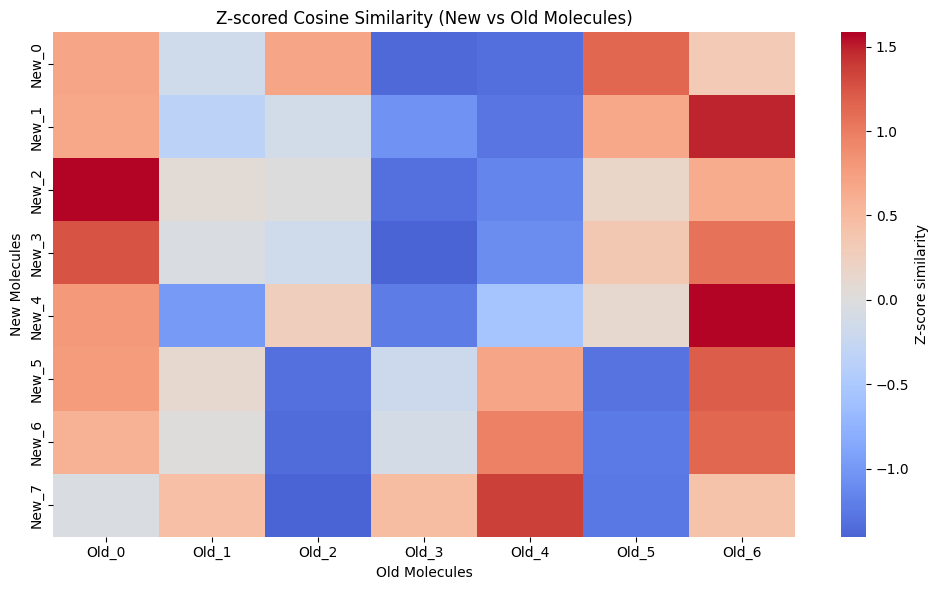

                 Top1            Top2            Top3
New_0  Old_5 (0.9987)  Old_2 (0.9972)  Old_0 (0.9972)
New_1  Old_6 (0.9934)  Old_0 (0.9917)  Old_5 (0.9917)
New_2  Old_0 (0.9989)  Old_6 (0.9966)  Old_5 (0.9954)
New_3  Old_0 (0.9982)  Old_6 (0.9978)  Old_5 (0.9960)
New_4  Old_6 (0.9949)  Old_0 (0.9937)  Old_2 (0.9929)
New_5  Old_6 (0.9877)  Old_0 (0.9864)  Old_4 (0.9862)
New_6  Old_6 (0.9886)  Old_4 (0.9880)  Old_0 (0.9868)
New_7  Old_4 (0.9881)  Old_3 (0.9840)  Old_1 (0.9839)


In [24]:
top_similar_df, zscored_sim = analyze_molecule_similarity(sim_df)
print(top_similar_df)


In [26]:
zscored_sim

,Old_0,Old_1,Old_2,Old_3,Old_4,Old_5,Old_6
New_0,0.688170,-0.160242,0.696204,-1.364871,-1.326515,1.131775,0.335584
New_1,0.667705,-0.346093,-0.125788,-1.063268,-1.282474,0.667705,1.482383
New_2,1.585162,0.072093,0.008457,-1.314072,-1.150422,0.162129,0.636751
New_3,1.257750,-0.044275,-0.145864,-1.391385,-1.093984,0.350443,1.067364
New_4,0.787222,-0.971531,0.266255,-1.237109,-0.554558,0.124889,1.584912
New_5,0.778897,0.125254,-1.316851,-0.190693,0.692804,-1.294439,1.204832
New_6,0.582059,0.009812,-1.350891,-0.109654,0.968536,-1.250186,1.150285
New_7,-0.043063,0.451050,-1.402383,0.471190,1.366436,-1.253303,0.409982


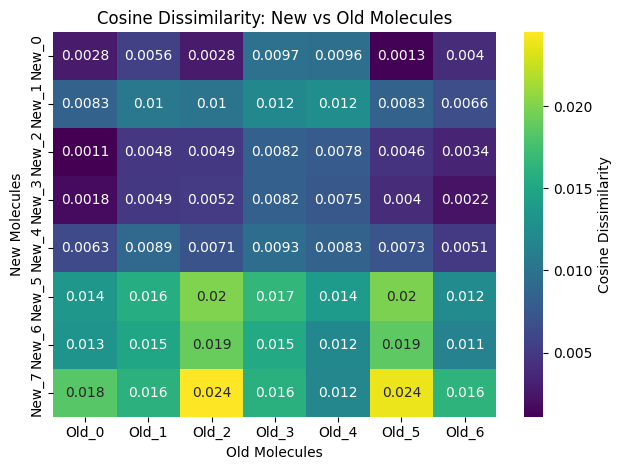

In [29]:
dissim_df = 1 - sim_df
sns.heatmap(dissim_df, annot=True, cmap="viridis", cbar_kws={'label': 'Cosine Dissimilarity'})
plt.title("Cosine Dissimilarity: New vs Old Molecules")
plt.xlabel("Old Molecules")
plt.ylabel("New Molecules")
plt.tight_layout()
plt.show()


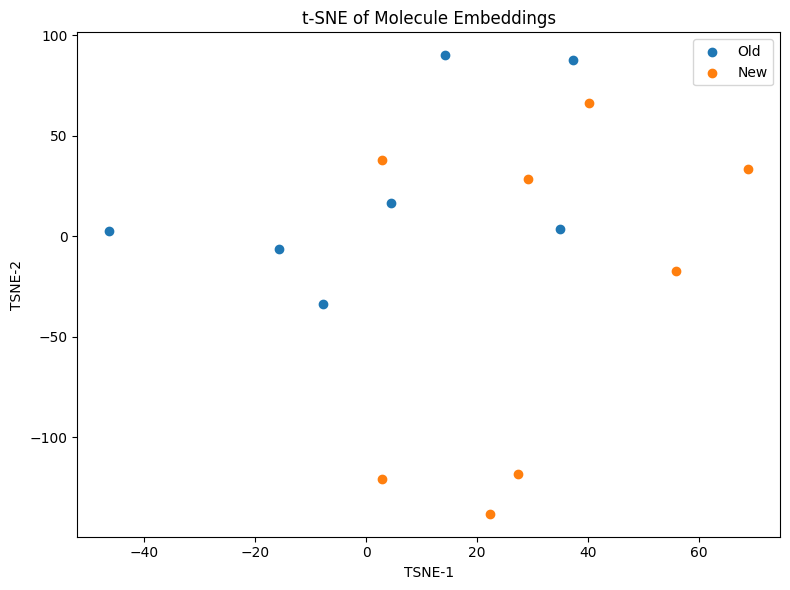

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

combined = pd.concat([x_emb_frame, x_emb_frame_new], axis=0)
labels = ['Old'] * len(x_emb_frame) + ['New'] * len(x_emb_frame_new)

tsne = TSNE(n_components=2, random_state=0, perplexity=5)
reduced = tsne.fit_transform(combined)

plt.figure(figsize=(8, 6))
for label in ['Old', 'New']:
    idxs = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(reduced[idxs, 0], reduced[idxs, 1], label=label)

plt.legend()
plt.title("t-SNE of Molecule Embeddings")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.tight_layout()
plt.show()


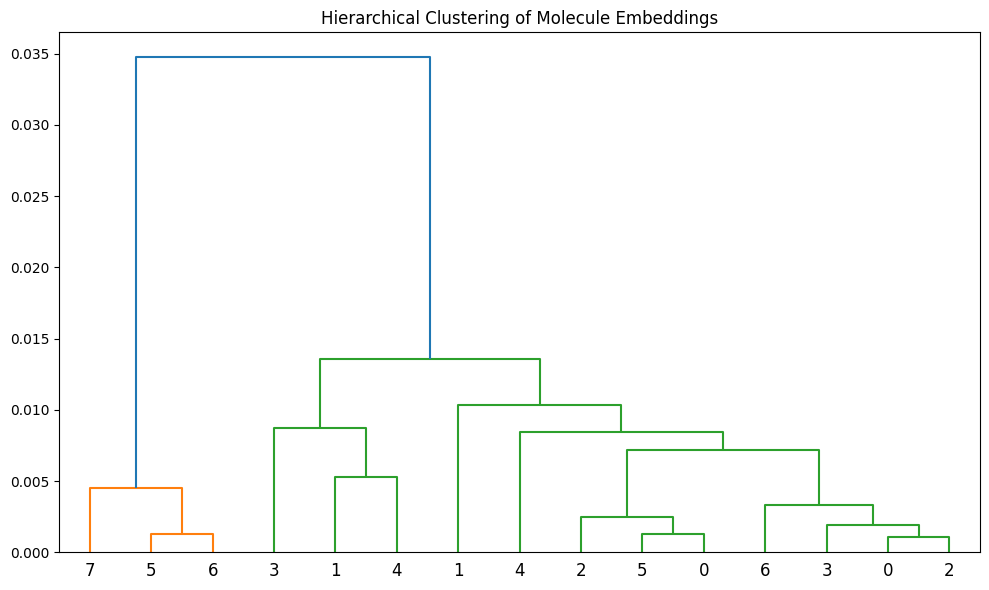

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram

from scipy.spatial.distance import pdist
combined = pd.concat([x_emb_frame, x_emb_frame_new])
labels = list(x_emb_frame.index) + list(x_emb_frame_new.index)

linked = linkage(pdist(combined, metric='cosine'), method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, labels=labels, orientation='top')
plt.title("Hierarchical Clustering of Molecule Embeddings")
plt.tight_layout()
plt.show()


In [9]:
old_names = [
    'Decanoic acid', 'Decanoate', 'Decylamine',
    'Decyltrimethyl ammonium bromid', 'Decyl sodium sulfate',
    'Decanol', 'Glycerol monodecanoate'
]

new_names = [
    'Decanal', 'Geraniol', 'Hexadecanoic acid', 'Myristoleic acid',
    'Glycine octylester', 'Perfluorooctanoic acid',
    '1H,1H,2H,2H-Tridecafluorooctane-1-sulphonic acid',
    'Heptadecafluorooctanesulfonic acid potassium salt'
]

In [35]:
sim_df.index = new_names
sim_df.columns = old_names

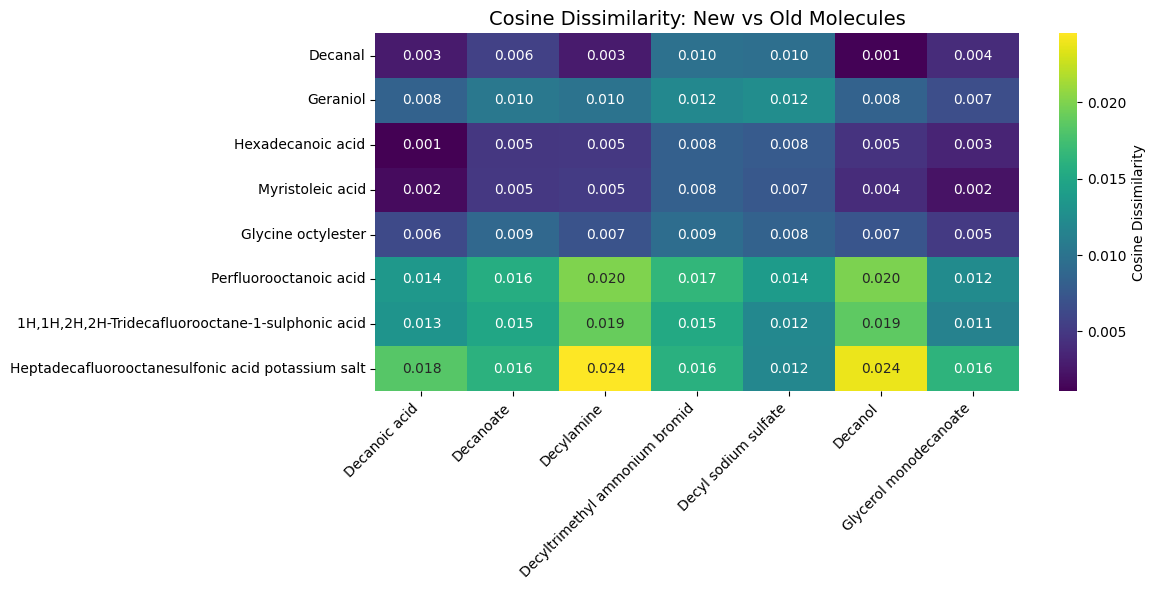

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cosine dissimilarity
dissim_df = 1 - sim_df

plt.figure(figsize=(12, 6))
sns.heatmap(dissim_df, annot=True, cmap="viridis", fmt=".3f", 
            xticklabels=old_names, yticklabels=new_names,
            cbar_kws={'label': 'Cosine Dissimilarity'})
plt.title("Cosine Dissimilarity: New vs Old Molecules", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


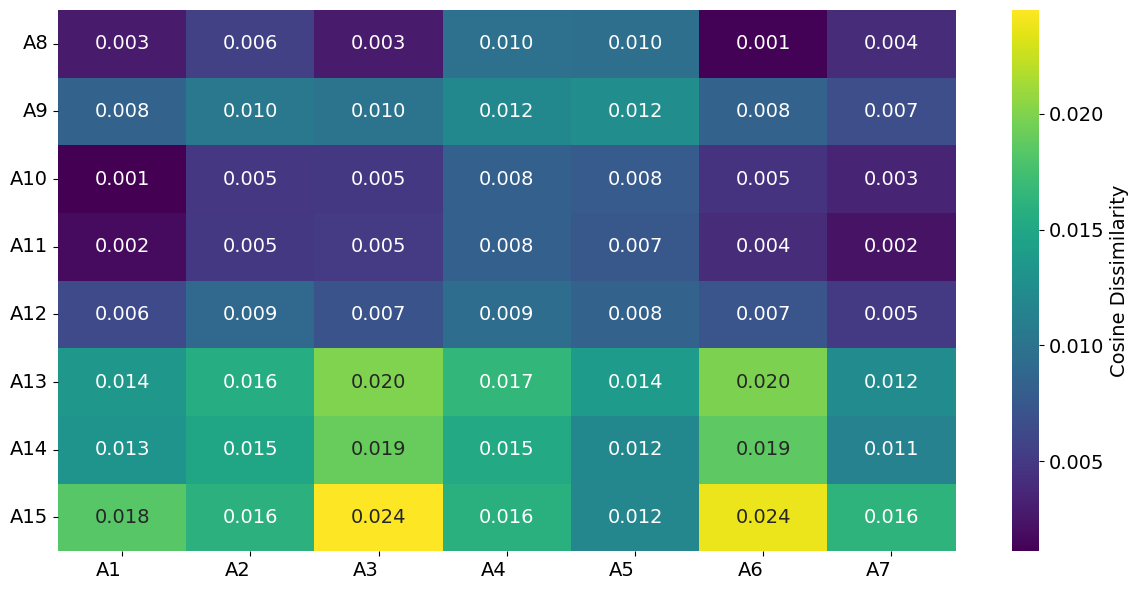

In [50]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    dissim_df, 
    annot=True, 
    cmap="viridis", 
    fmt=".3f",
    xticklabels=x_ids, 
    yticklabels=y_ids,
    annot_kws={"fontsize": 14},      # font size for annotated numbers
    cbar_kws={'label': 'Cosine Dissimilarity', 'ticks': None}  # placeholder for colorbar
)

# Increase font size of x and y ticks
plt.xticks(rotation=0, ha="right", fontsize=14)
plt.yticks(rotation=0, fontsize=14)

# Increase font size of colorbar label and ticks
cbar = plt.gcf().axes[-1]  # colorbar axis
cbar.set_ylabel('Cosine Dissimilarity', fontsize=14)
cbar.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig("../results/cosine_similarity_amphiphiles_latent_space.png", dpi=500, bbox_inches="tight")
plt.show()


In [73]:
x_ids = [f"P{i+1}" for i in range(len(old_names))] 
y_ids=[f"H{i+1}" for i in range(5)] + \
      [f"F{i+1}" for i in range(3)]

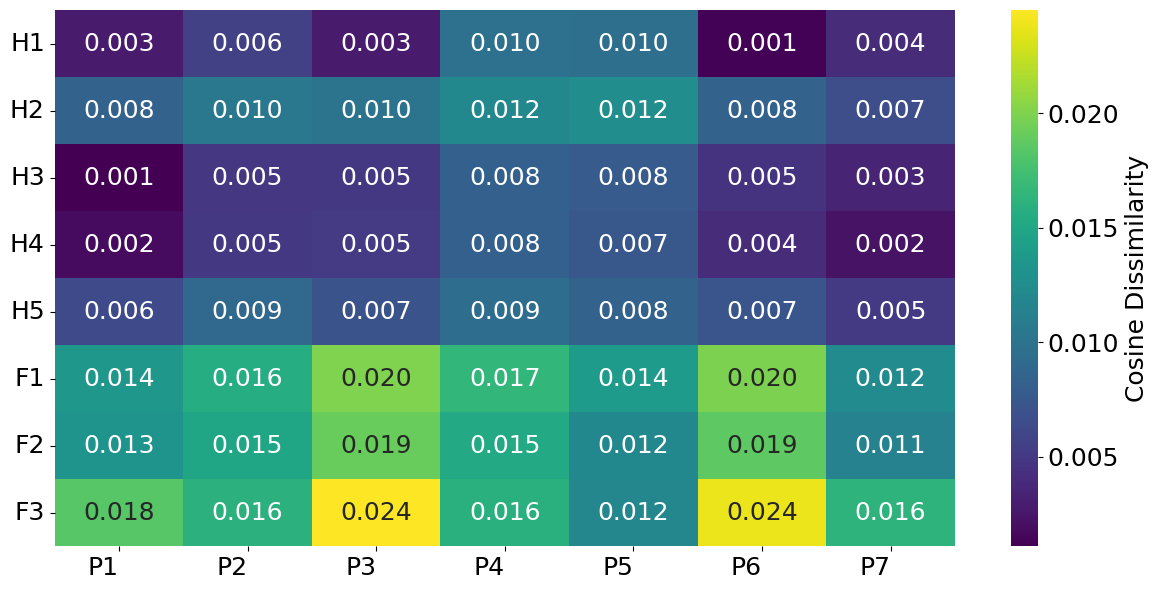

In [74]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    dissim_df, 
    annot=True, 
    cmap="viridis", 
    fmt=".3f",
    xticklabels=x_ids, 
    yticklabels=y_ids,
    annot_kws={"fontsize": 18},      # font size for annotated numbers
    cbar_kws={'label': 'Cosine Dissimilarity', 'ticks': None}  # placeholder for colorbar
)

# Increase font size of x and y ticks
plt.xticks(rotation=0, ha="right", fontsize=18)
plt.yticks(rotation=0, fontsize=18)

# Increase font size of colorbar label and ticks
cbar = plt.gcf().axes[-1]  # colorbar axis
cbar.set_ylabel('Cosine Dissimilarity', fontsize=18)
cbar.tick_params(labelsize=18)

plt.tight_layout()
plt.savefig("../results/cosine_similarity_amphiphiles_latent_space.png", dpi=600, bbox_inches="tight")
plt.show()


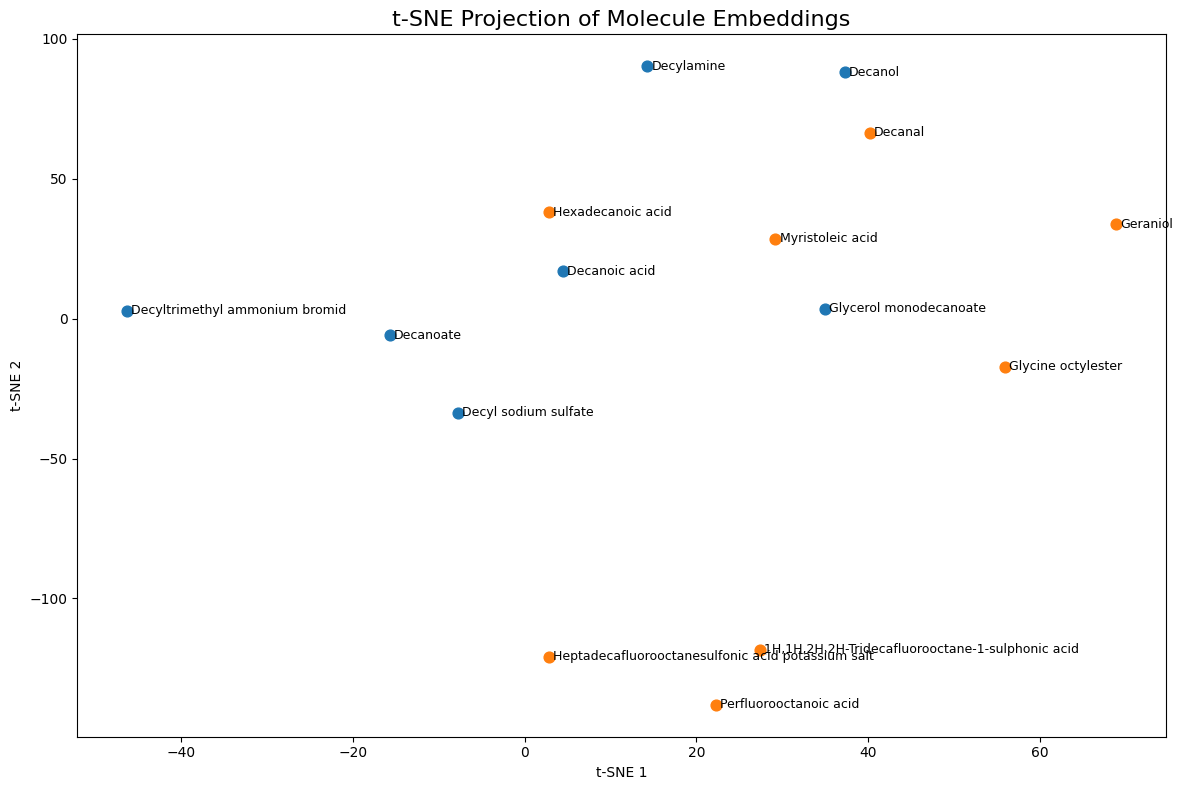

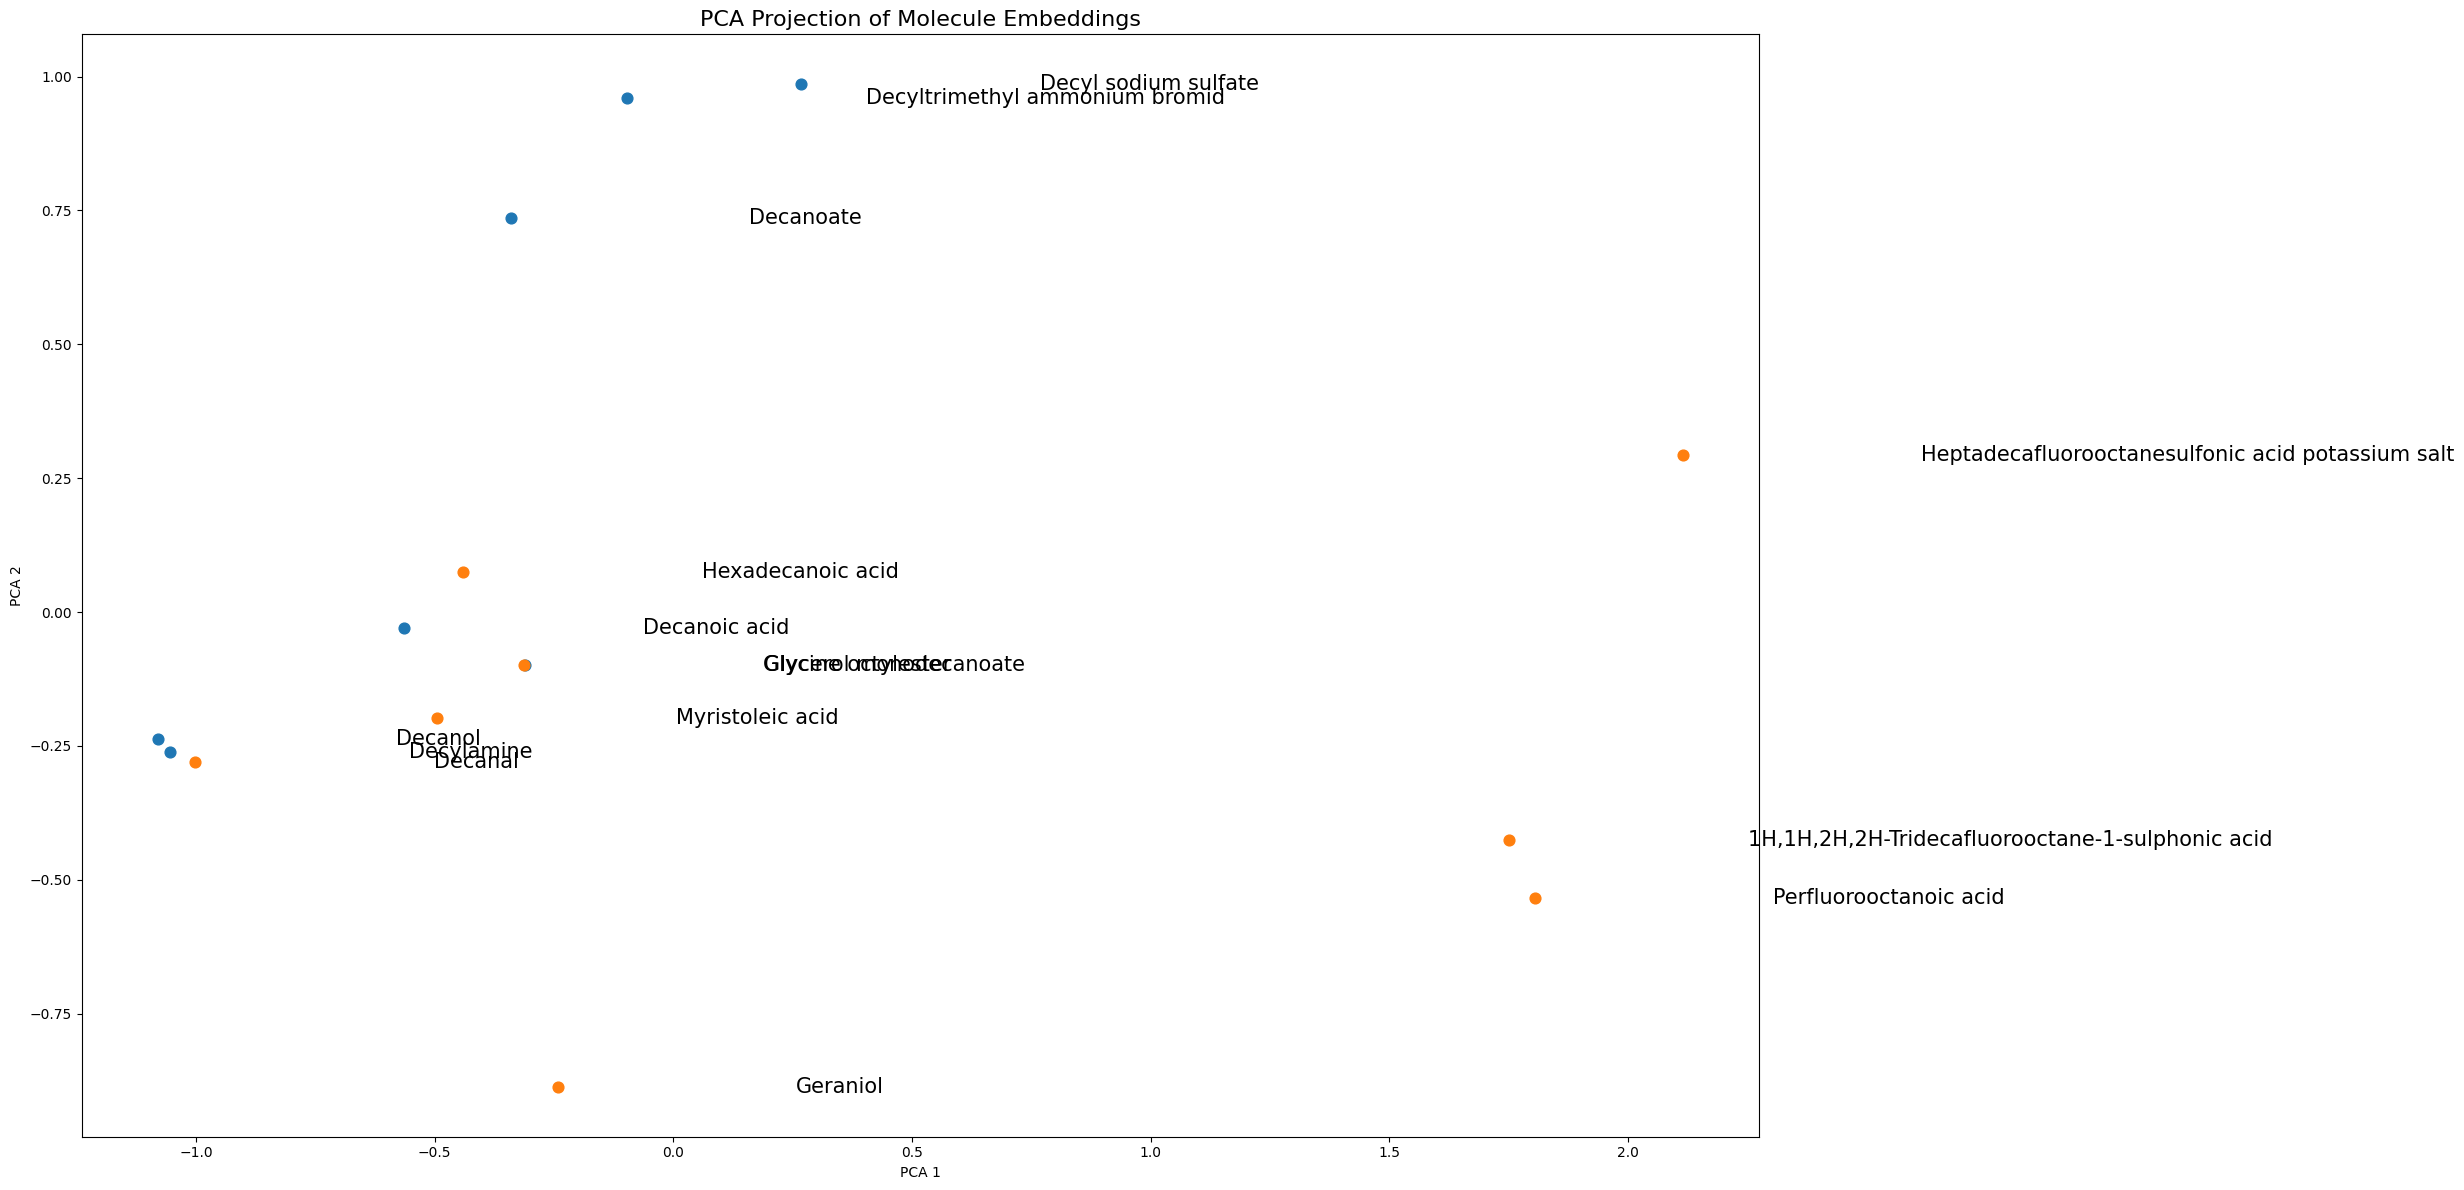

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA



all_names = old_names + new_names
colors = ['tab:blue'] * len(old_names) + ['tab:orange'] * len(new_names)

# Combine embeddings
combined = pd.concat([x_emb_frame, x_emb_frame_new], ignore_index=True)

# Helper function for plotting
def plot_embedding(embedding, method='t-SNE', figuresize=(12,8), font=9):
    plt.figure(figsize=figuresize)
    for i, name in enumerate(all_names):
        plt.scatter(embedding[i, 0], embedding[i, 1], color=colors[i], s=60)
        plt.text(embedding[i, 0]+0.5, embedding[i, 1], name, fontsize=font, va='center')

    plt.title(f"{method} Projection of Molecule Embeddings", fontsize=16)
    plt.xlabel(f"{method} 1")
    plt.ylabel(f"{method} 2")
    plt.tight_layout()
    plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
tsne_result = tsne.fit_transform(combined)
plot_embedding(tsne_result, method='t-SNE')

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined)
plot_embedding(pca_result, method='PCA', figuresize=(25,12), font=15)


In [60]:
pca.explained_variance_ratio_

array([0.48242152, 0.1276276 ], dtype=float32)

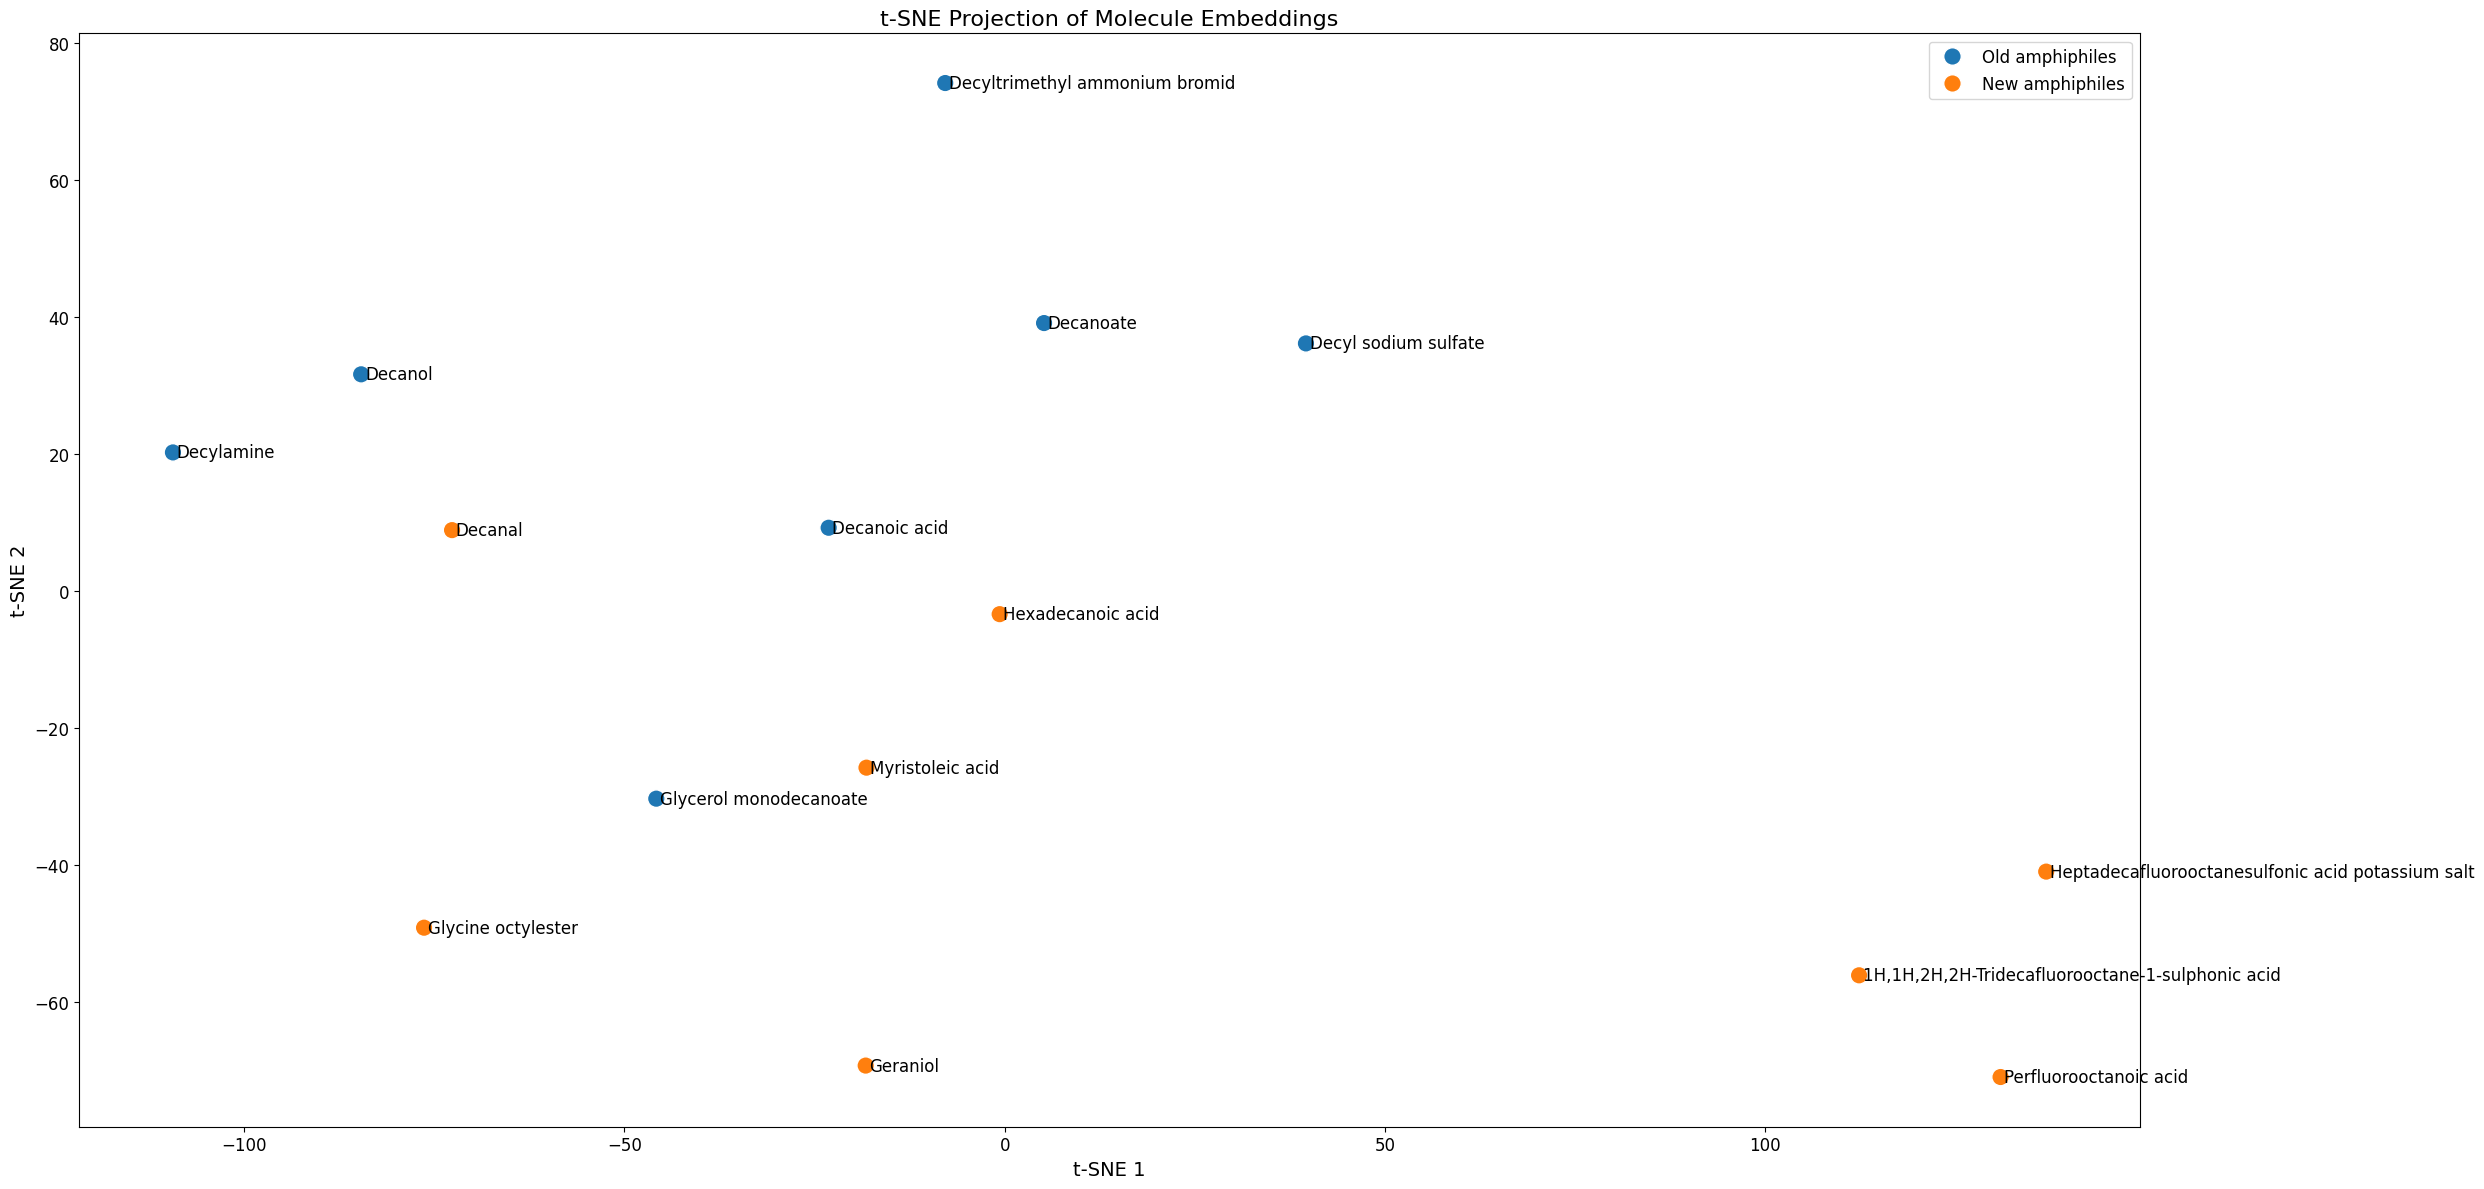

In [22]:
all_names = old_names + new_names
# Combine embeddings
combined = pd.concat([x_emb_frame, x_emb_frame_new], ignore_index=True)

# Run t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
tsne_result = tsne.fit_transform(combined)

# Prepare DataFrame for seaborn
embedding_df = pd.DataFrame(tsne_result, columns=["t-SNE 1", "t-SNE 2"])
embedding_df["Name"] = all_names
embedding_df["Group"] = ["Old amphiphiles"] * len(old_names) + ["New amphiphiles"] * len(new_names)

# Plot with seaborn
plt.figure(figsize=(25, 12))
sns.scatterplot(
    data=embedding_df,
    x="t-SNE 1", y="t-SNE 2",
    hue="Group",
    palette={"Old amphiphiles": "tab:blue", "New amphiphiles": "tab:orange"},
    s=160
)

# Annotate each point
for i, row in embedding_df.iterrows():
    plt.text(
        row["t-SNE 1"] + 0.5, row["t-SNE 2"], row["Name"],
        fontsize=12, va="center"
    )

# Formatting
plt.title("t-SNE Projection of Molecule Embeddings", fontsize=16)
plt.xlabel("t-SNE 1", fontsize=14)
plt.ylabel("t-SNE 2", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend( fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

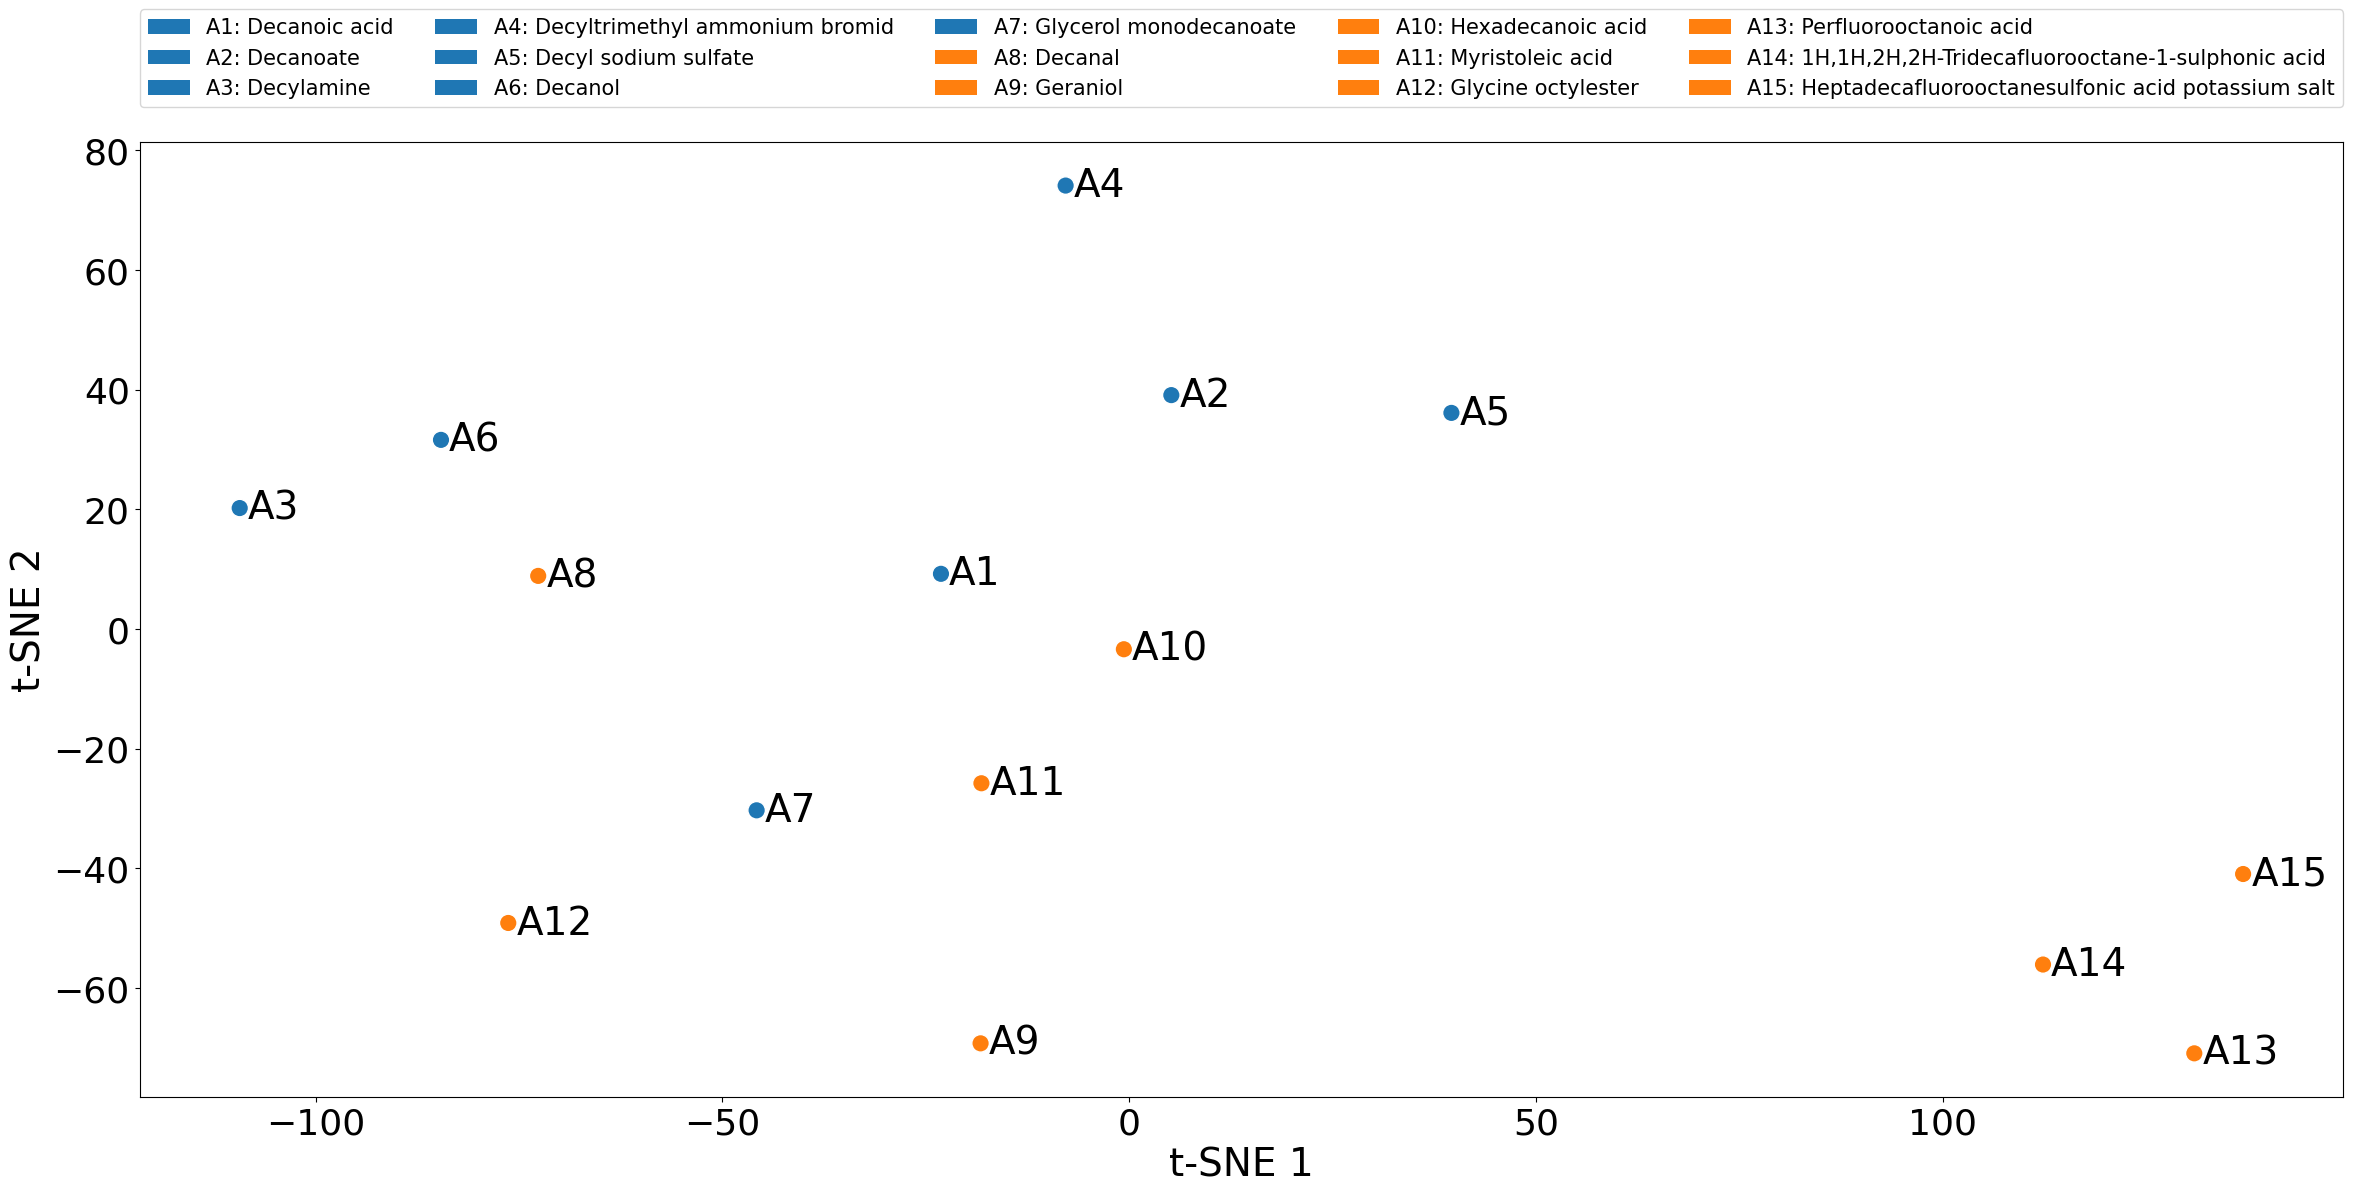

     ID                                               Name            Group
0    A1                                      Decanoic acid  Old amphiphiles
1    A2                                          Decanoate  Old amphiphiles
2    A3                                         Decylamine  Old amphiphiles
3    A4                     Decyltrimethyl ammonium bromid  Old amphiphiles
4    A5                               Decyl sodium sulfate  Old amphiphiles
5    A6                                            Decanol  Old amphiphiles
6    A7                             Glycerol monodecanoate  Old amphiphiles
7    A8                                            Decanal  New amphiphiles
8    A9                                           Geraniol  New amphiphiles
9   A10                                  Hexadecanoic acid  New amphiphiles
10  A11                                   Myristoleic acid  New amphiphiles
11  A12                                 Glycine octylester  New amphiphiles
12  A13     

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE

# Combine names and embeddings
all_names = old_names + new_names
combined = pd.concat([x_emb_frame, x_emb_frame_new], ignore_index=True)

# Run t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
tsne_result = tsne.fit_transform(combined)

# Generate short IDs
ids = [f"A{i+1}" for i in range(len(all_names))]
legend_labels = [f"{ids[i]}: {all_names[i]}" for i in range(len(all_names))]

# Prepare DataFrame for seaborn
embedding_df = pd.DataFrame(tsne_result, columns=["t-SNE 1", "t-SNE 2"])
embedding_df["ID"] = ids
embedding_df["Name"] = all_names
embedding_df["Group"] = ["Old amphiphiles"] * len(old_names) + ["New amphiphiles"] * len(new_names)

# Plot with seaborn
plt.figure(figsize=(25, 12))
sns.scatterplot(
    data=embedding_df,
    x="t-SNE 1", y="t-SNE 2",
    hue="Group",
    palette={"Old amphiphiles": "tab:blue", "New amphiphiles": "tab:orange"},
    s=160,
    legend=False
)

# Annotate each point with short ID
for i, row in embedding_df.iterrows():
    plt.text(
        row["t-SNE 1"] + 1.0, row["t-SNE 2"], row["ID"],
        fontsize=28, va="center"
    )

# Formatting
# plt.title("t-SNE Projection of Molecule Embeddings", fontsize=16)
plt.xlabel("t-SNE 1", fontsize=28)
plt.ylabel("t-SNE 2", fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# plt.legend(fontsize=12, title_fontsize=13)
# Manually add custom legend for all molecules
from matplotlib.patches import Patch
custom_handles = [
    Patch(
        facecolor="tab:blue" if embedding_df.loc[i, "Group"]=="Old amphiphiles" else "tab:orange",
        label=legend_labels[i]
    )
    for i in range(len(legend_labels))
]

plt.legend(
    handles=custom_handles,
    bbox_to_anchor=(0.5, 1.15),
    loc="upper center",
    fontsize=15,
    title_fontsize=12,
    ncol=5   # adjust depending on how many molecules
)

plt.savefig("../results/tsne_amphiphiles_latent_space.png", dpi=500, bbox_inches="tight")

plt.tight_layout()
plt.show()

# Lookup table for molecule IDs
lookup_table = embedding_df[["ID", "Name", "Group"]]
print(lookup_table)


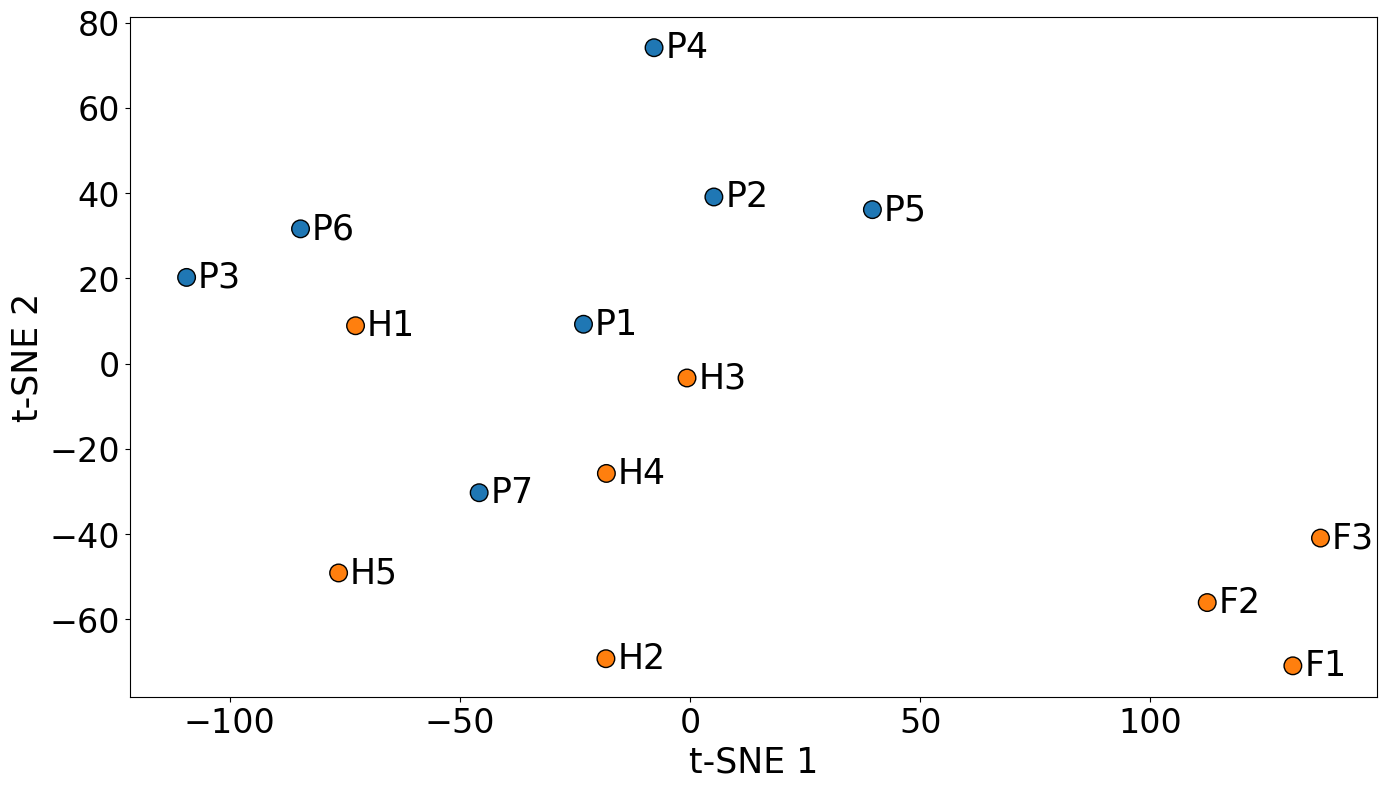

In [71]:
# Replot, no legend

ids = [f"P{i+1}" for i in range(len(old_names))] + \
      [f"H{i+1}" for i in range(5)] + \
      [f"F{i+1}" for i in range(3)]

embedding_df["ID"] = ids

# Plot with seaborn (no legend)
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=embedding_df,
    x="t-SNE 1", y="t-SNE 2",
    hue="Group",
    palette={"Old amphiphiles": "tab:blue", "New amphiphiles": "tab:orange"},
    s=160,
    legend=False,
    edgecolor="black",
)

# Annotate each point with short ID
for i, row in embedding_df.iterrows():
    plt.text(
        row["t-SNE 1"] + 2.5, row["t-SNE 2"], row["ID"],
        fontsize=25, va="center"
    )

# Formatting
plt.xlabel("t-SNE 1", fontsize=25)
plt.ylabel("t-SNE 2", fontsize=25)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.savefig("../results/tsne_amphiphiles_latent_space.png", dpi=600, bbox_inches="tight")
plt.tight_layout()
plt.show()

# Lookup table for molecule IDs
# lookup_table = embedding_df[["ID", "Name", "Group"]]
# print(lookup_table)

In [26]:
embedding_df

,t-SNE 1,t-SNE 2,ID,Name,Group
0,-23.142031,9.226758,A1,Decanoic acid,Old amphiphiles
1,5.178580,39.083420,A2,Decanoate,Old amphiphiles
2,-109.351288,20.214006,A3,Decylamine,Old amphiphiles
3,-7.816936,74.095154,A4,Decyltrimethyl ammonium bromid,Old amphiphiles
4,39.609467,36.114433,A5,Decyl sodium sulfate,Old amphiphiles
5,-84.605125,31.607368,A6,Decanol,Old amphiphiles
6,-45.802757,-30.289576,A7,Glycerol monodecanoate,Old amphiphiles
7,-72.653984,8.879839,A8,Decanal,New amphiphiles
8,-18.272715,-69.222610,A9,Geraniol,New amphiphiles
9,-0.657762,-3.376927,A10,Hexadecanoic acid,New amphiphiles


In [ ]:
# So why when after scale with the concentration, the explained variance only concentrate on PC1?

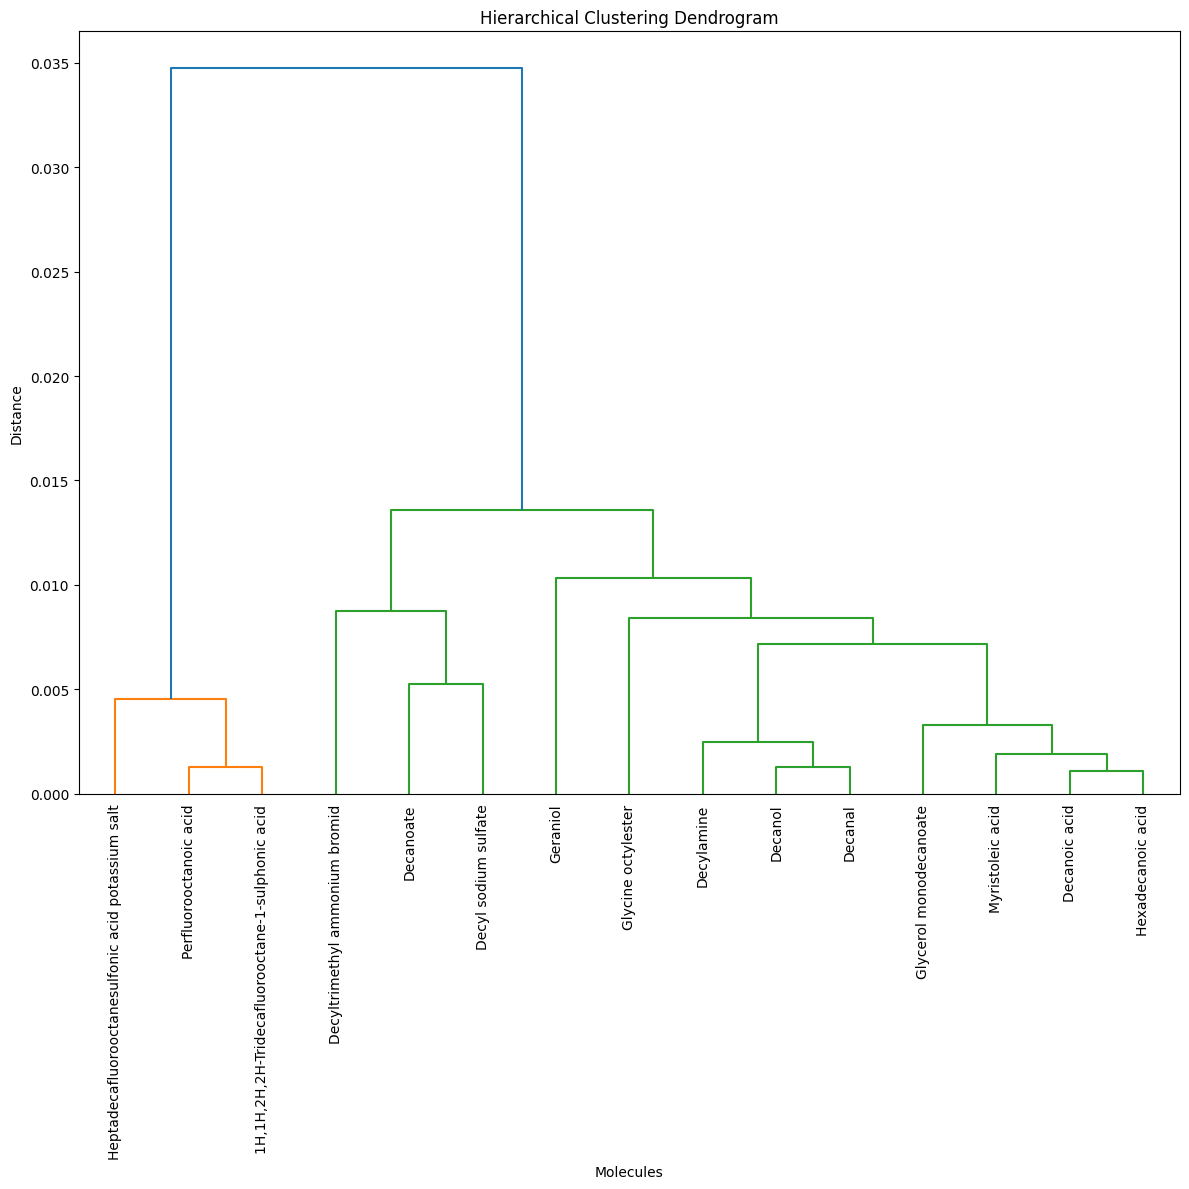

In [56]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import numpy as np

# Combine embeddings
combined = pd.concat([x_emb_frame, x_emb_frame_new], ignore_index=True)
combined_array = combined.to_numpy()

# Molecule names
all_names = [
    'Decanoic acid', 'Decanoate', 'Decylamine',
    'Decyltrimethyl ammonium bromid', 'Decyl sodium sulfate',
    'Decanol', 'Glycerol monodecanoate',
    'Decanal', 'Geraniol', 'Hexadecanoic acid', 'Myristoleic acid',
    'Glycine octylester', 'Perfluorooctanoic acid',
    '1H,1H,2H,2H-Tridecafluorooctane-1-sulphonic acid',
    'Heptadecafluorooctanesulfonic acid potassium salt'
]

# Compute the distance matrix and linkage
dist_matrix = pdist(combined_array, metric='cosine')  # you can also try 'euclidean'
linked = linkage(dist_matrix, method='ward')  # or try 'average', 'complete'

# Plot the dendrogram
plt.figure(figsize=(12, 12))
dendrogram(
    linked,
    labels=all_names,
    leaf_rotation=90,
    leaf_font_size=10,
    orientation='top',  # change to 'left' if you want a vertical tree
    color_threshold=0.7 * max(linked[:, 2])
)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Molecules")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [ ]:
# How about wasserstein distance?